In [1]:
import pandas as pd
import numpy as np
import mne
from mne import create_info
from mne.io import RawArray
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Prepare 
def df_to_raw(df):
    sfreq = 512
    ch_names = list(df.columns)
    ch_types = ['eeg'] * (len(df.columns) - 1) + ['stim'] 
    ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

    df = df.T  #mne looks at the tranpose() format
    df[:-1] *= 1e-6  #convert from uVolts to Volts (mne assumes Volts data)

    info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

    raw = mne.io.RawArray(df, info)
    raw.set_montage(ten_twenty_montage)

    #try plotting the raw data of its power spectral density
    raw.plot_psd()

    return raw

In [3]:
#Prepare Data 
group1_data = pd.read_csv('group_01.csv', delimiter = ',', dtype = 'float64')
header_data = pd.read_csv('Header.csv', delimiter = ',')

#Add header to dataset
group1_data.columns = list(header_data)
group1 = group1_data.drop(['Time'], axis = 1) # Drop Time column
#print(group1.columns)


#Prepare standard 10-20 systems
header = ['Fp1', 'Fp2', 'AFz', 'F7', 'F3', 'F4', 'F8', 
          'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 
          'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 
          'P3', 'Pz', 'P4', 'P8', 'PO7', 'O1', 'Oz', 
          'O2', 'PO8', 'PO9', 'PO10','Target']

In [4]:
#For Subject1

group1_s1 = group1.iloc[:, :32]  # Slicing data for subject1
group1_s1['Target'] = group1_data['Target'] # Add Target column
group1_s1.columns = header # Add column names
print(group1_s1.columns)


Index(['Fp1', 'Fp2', 'AFz', 'F7', 'F3', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
       'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3',
       'Pz', 'P4', 'P8', 'PO7', 'O1', 'Oz', 'O2', 'PO8', 'PO9', 'PO10',
       'Target'],
      dtype='object')


In [5]:
#For Subject2

group1_s2 = group1.iloc[:, 32:-2] # Slicing data for subject2
group1_s2['Target'] = group1_data['Target'] # Add Target column
group1_s2.columns = header # Add column names
print(group1_s2.columns)

Index(['Fp1', 'Fp2', 'AFz', 'F7', 'F3', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
       'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3',
       'Pz', 'P4', 'P8', 'PO7', 'O1', 'Oz', 'O2', 'PO8', 'PO9', 'PO10',
       'Target'],
      dtype='object')


### Subject1

_______________________RawArray for Subject1______________________
Creating RawArray with float64 data, n_channels=33, n_times=454431
    Range : 0 ... 454430 =      0.000 ...   887.559 secs
Ready.
Effective window size : 4.000 (s)


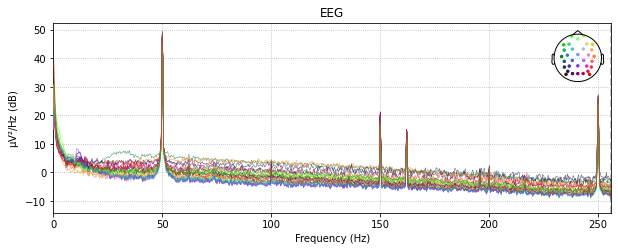

In [6]:
print("_______________________RawArray for Subject1______________________")
raw_s1 = df_to_raw(group1_s1)


In [7]:
raw_s1.notch_filter(50, filter_length='auto', phase='zero')

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3381 samples (6.604 sec)



TypeError: expected str, bytes or os.PathLike object, not NoneType

<RawArray | 33 x 454431 (887.6 s), ~114.5 MB, data loaded>

Effective window size : 4.000 (s)


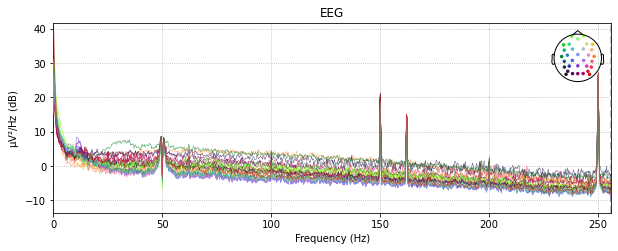

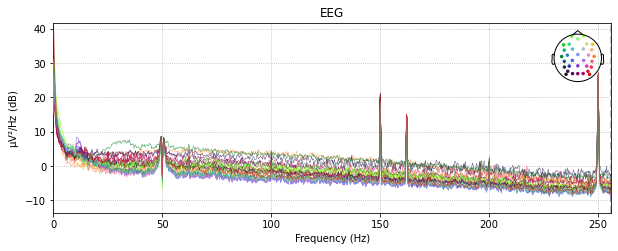

In [8]:
raw_s1.plot_psd()

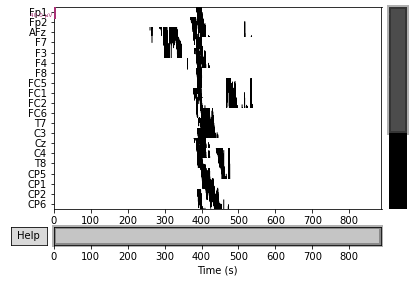

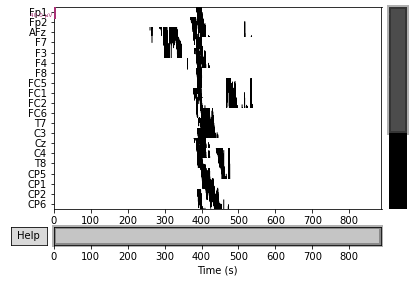

In [9]:
eeg_channels = mne.pick_types(raw_s1.info, eeg=True)
raw_s1.plot(duration=1200, order=eeg_channels) # the duration for one session is around five minutes, so 20mins(1200s) for four sessions

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 16897 samples (33.002 sec)



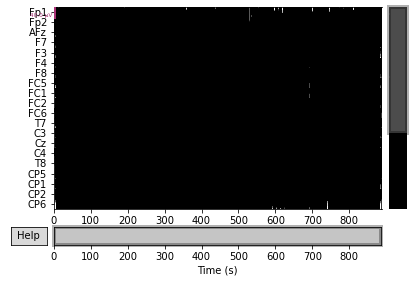

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 8449 samples (16.502 sec)



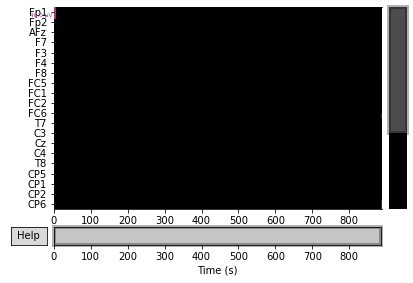

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 sec)



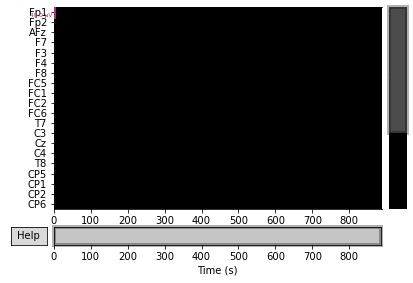

In [10]:
for cutoff in (0.1, 0.2, 1):
    raw_highpass = raw_s1.copy().filter(l_freq=cutoff, h_freq=None)
    fig = raw_highpass.plot(duration=1200, order=eeg_channels)
    fig.subplots_adjust(top=0.9)
    fig.suptitle('High-pass filtered at {} Hz'.format(cutoff), size='xx-large',
                 weight='bold')

Looks like 0.2Hz was quite quite good to fully remove the slow drifts. Usually, 0.2Hz is a good measure since most of the brain frequency lies around 0.2 to 40Hz. Given that, we shall filter our brain signal to 0.2 to 40Hz

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.20, 40.00 Hz: -6.02, -6.02 dB

Effective window size : 4.000 (s)


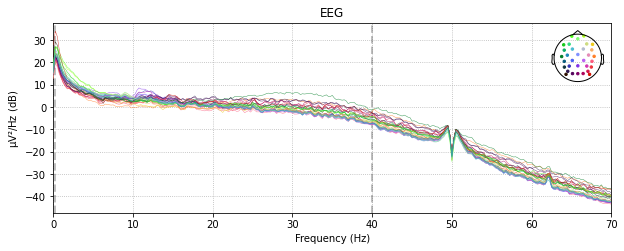

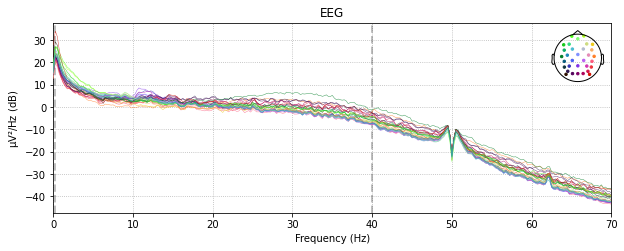

In [11]:
raw_s1.filter(0.2,40, method = 'iir')
raw_s1.plot_psd(fmax = 70)

### Subject2

_______________________RawArray for Subject2______________________
Creating RawArray with float64 data, n_channels=33, n_times=454431
    Range : 0 ... 454430 =      0.000 ...   887.559 secs
Ready.
Effective window size : 4.000 (s)


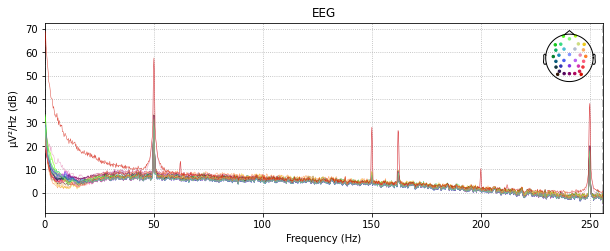

In [12]:
print("_______________________RawArray for Subject2______________________")
raw_s2 = df_to_raw(group1_s2)

In [13]:
raw_s2.notch_filter(50, filter_length='auto', phase='zero')

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3381 samples (6.604 sec)



TypeError: expected str, bytes or os.PathLike object, not NoneType

<RawArray | 33 x 454431 (887.6 s), ~114.5 MB, data loaded>

Effective window size : 4.000 (s)


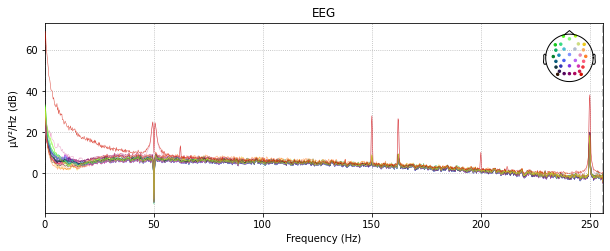

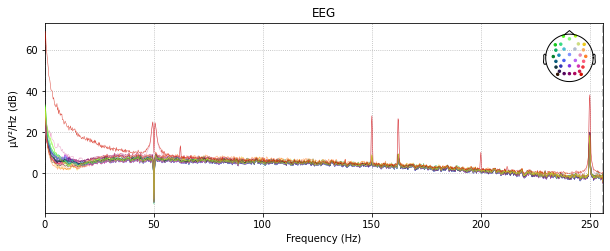

In [14]:
raw_s2.plot_psd()

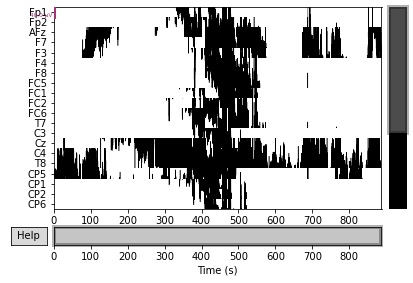

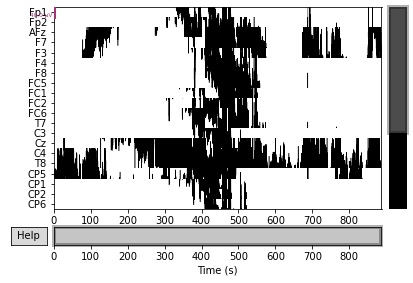

In [15]:
eeg_channels = mne.pick_types(raw_s2.info, eeg=True)
raw_s2.plot(duration=1200, order=eeg_channels) # the duration for one session is around five minutes, so 20mins(1200s) for four sessions

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 16897 samples (33.002 sec)



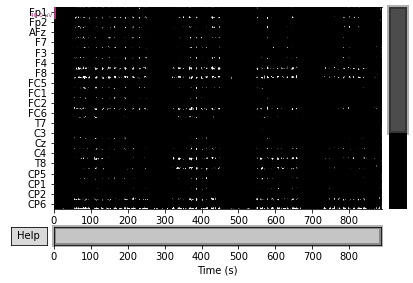

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 8449 samples (16.502 sec)



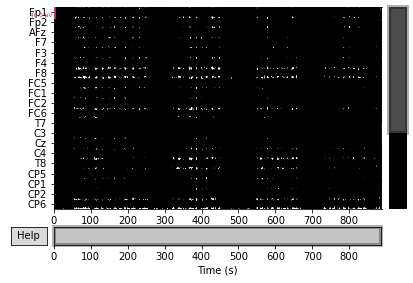

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 sec)



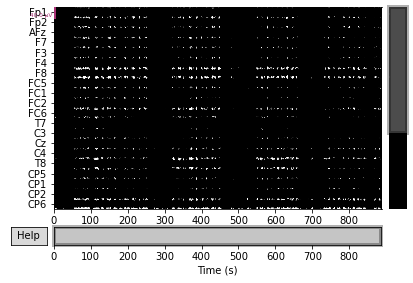

In [16]:
for cutoff in (0.1, 0.2, 1):
    raw_highpass = raw_s1.copy().filter(l_freq=cutoff, h_freq=None)
    fig = raw_highpass.plot(duration=1200, order=eeg_channels)
    fig.subplots_adjust(top=0.9)
    fig.suptitle('High-pass filtered at {} Hz'.format(cutoff), size='xx-large',
                 weight='bold')